In [65]:
#getting and working with data
import pandas as pd
from sklearn.cluster import KMeans,DBSCAN
from sklearn.preprocessing import StandardScaler, Normalizer
import numpy as np
from sklearn.metrics.cluster import silhouette_score

#visualizing results
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [8]:
book_movie_data = pd.read_csv('book_movie_database.csv')
book_movie_data_no_rating = book_movie_data.drop("movie_rating",axis=1)
book_movie_data_no_rating.head(2)

,book_title,book_rating,book_number_ratings,book_year_published,popularity,release_date,movie_runtime,movie_number_ratings,genres
0,Fight Club,4.20,434993,1996,63.87,"Friday, October 15, 1999",139,9678,"[{'id': 18, 'name': 'Drama'}]"
1,Forrest Gump,4.06,55182,1986,48.31,"Wednesday, July 6, 1994",142,8147,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."


In [9]:
book_movie_data_no_rating = book_movie_data_no_rating[['book_rating', 'book_number_ratings', 'book_year_published', 'popularity', 'movie_runtime', 'movie_number_ratings']]

In [10]:
book_movie_features = book_movie_data_no_rating.columns

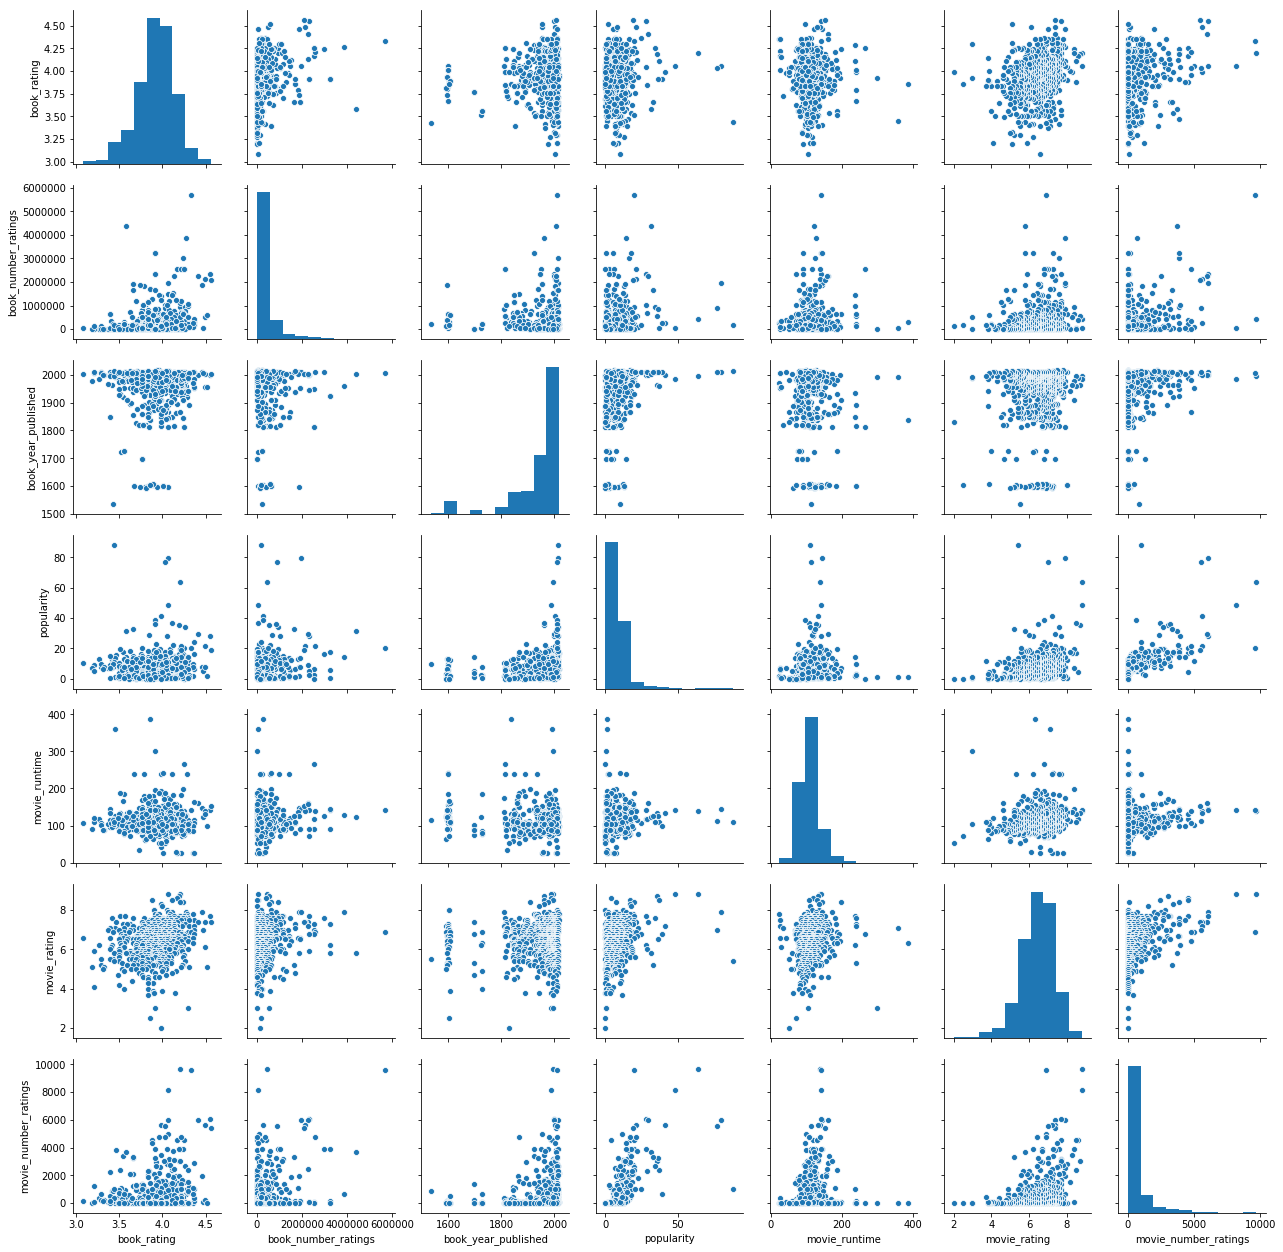

In [11]:
sns.pairplot(book_movie_data)

In [12]:
kmeans = KMeans(n_clusters=2,random_state=1234)
kmeans.fit(book_movie_data_no_rating[book_movie_features])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1234, tol=0.0001, verbose=0)

book_rating             float64
book_number_ratings       int64
book_year_published       int64
popularity              float64
movie_runtime             int64
movie_number_ratings      int64
kmeans_2                 object
dtype: object


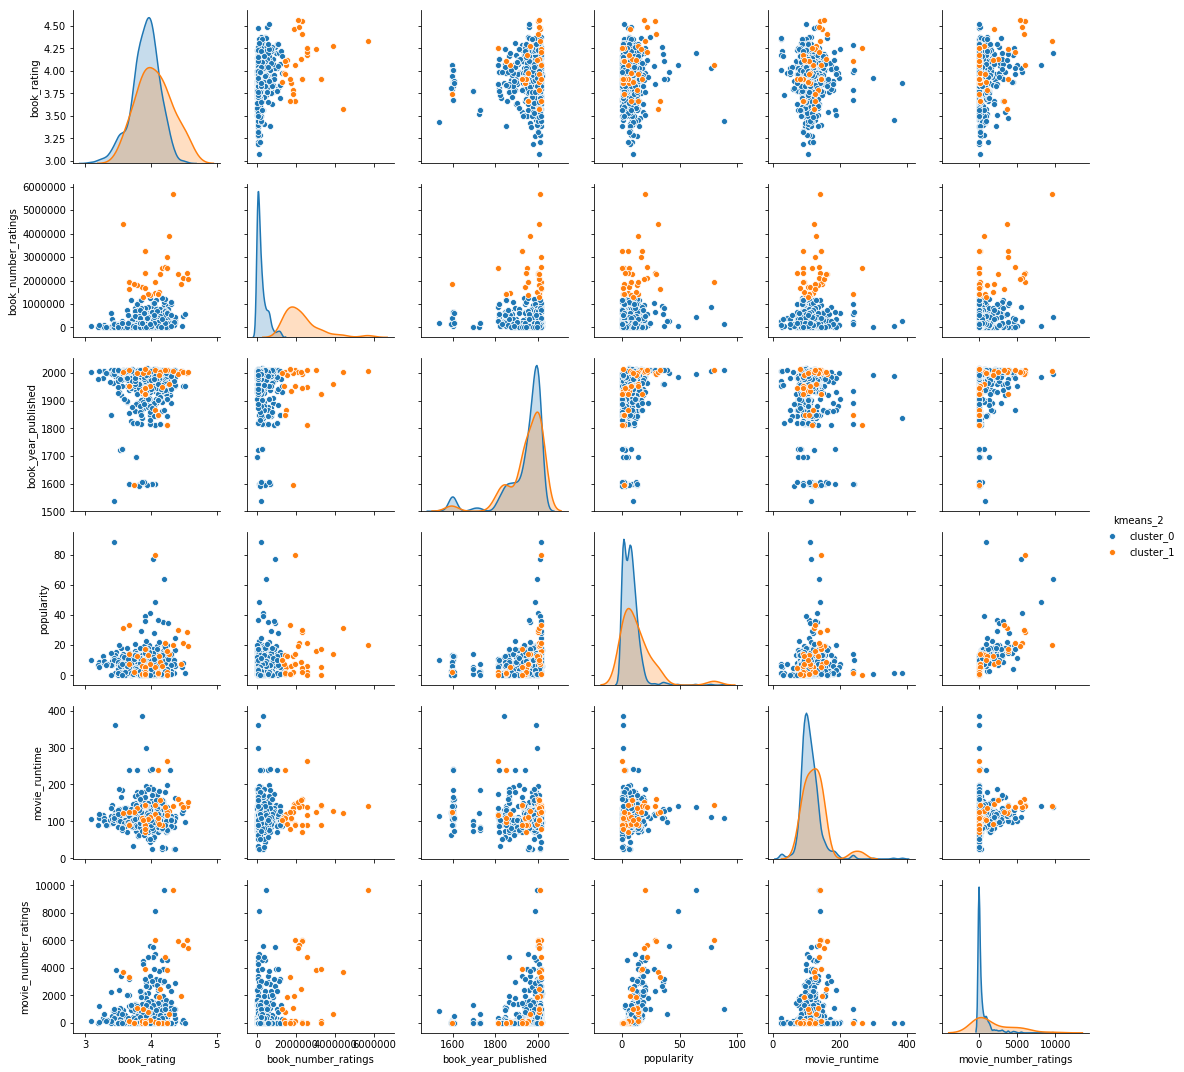

In [13]:
book_movie_data_no_rating["kmeans_2"] = ["cluster_"+str(label) for label in kmeans.labels_]
print(book_movie_data_no_rating.dtypes)
sns.pairplot(book_movie_data_no_rating,hue="kmeans_2")

In [14]:
print("Cluster centers found by k-means:\n",kmeans.cluster_centers_)

Cluster centers found by k-means:
 [[3.91591463e+00 2.31769311e+05 1.93779726e+03 7.70213415e+00
  1.11844512e+02 5.22532012e+02]
 [4.05500000e+00 2.27816836e+06 1.94533333e+03 1.30194444e+01
  1.26638889e+02 1.92477778e+03]]


In [15]:
book_movie_2_cluster_centers = book_movie_data_no_rating.groupby("kmeans_2").mean()
print("Means of each column :\n",book_movie_2_cluster_centers.values)

Means of each column :
 [[3.91591463e+00 2.31769311e+05 1.93779726e+03 7.70213415e+00
  1.11844512e+02 5.22532012e+02]
 [4.05500000e+00 2.27816836e+06 1.94533333e+03 1.30194444e+01
  1.26638889e+02 1.92477778e+03]]


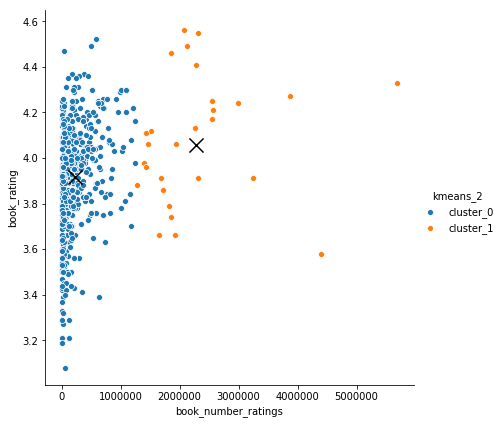

In [16]:
colors = np.array(['red', 'green'])

sns.pairplot(book_movie_data_no_rating,x_vars="book_number_ratings",y_vars="book_rating",hue="kmeans_2",height=6)
plt.scatter(book_movie_2_cluster_centers.book_number_ratings, book_movie_2_cluster_centers.book_rating, linewidths=3, marker='x', s=200, c='black')

In [17]:
# center and scale the data
scaler = StandardScaler()
book_movie_data_scaled = scaler.fit_transform(book_movie_data_no_rating[book_movie_features])
book_movie_data_scaled = pd.DataFrame(book_movie_data_scaled,columns=book_movie_features)
print("Before scaling:\n", book_movie_data_no_rating[book_movie_features].describe())
print("\nAfter scaling:\n", np.round(book_movie_data_scaled.describe(),2))

Before scaling:
        book_rating  book_number_ratings  book_year_published  popularity  \
count   692.000000         6.920000e+02           692.000000  692.000000   
mean      3.923150         3.382294e+05          1938.189306    7.978757   
std       0.221697         5.651928e+05            96.271491    8.283684   
min       3.080000         2.090000e+02          1536.000000    0.030000   
25%       3.800000         3.443600e+04          1920.250000    2.477500   
50%       3.940000         1.516020e+05          1975.500000    6.845000   
75%       4.070000         4.031765e+05          1998.000000   10.755000   
max       4.560000         5.680570e+06          2018.000000   88.440000   

       movie_runtime  movie_number_ratings  
count     692.000000            692.000000  
mean      112.614162            595.481214  
std        32.189606           1162.888966  
min        25.000000              1.000000  
25%        95.000000             20.000000  
50%       107.500000        

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [18]:
# K-means on scaled data
km = KMeans(n_clusters=2,random_state=1234)
km.fit(book_movie_data_scaled)
book_movie_data_no_rating['kmeans_2_scaled'] = [ "cluster_" + str(label) for label in km.labels_ ]
print(km.cluster_centers_)
book_movie_data_no_rating.groupby('kmeans_2_scaled').mean()

[[ 0.67260443  1.33839679  0.50900817  2.10857973  0.43321242  2.84915159]
 [-0.05351455 -0.10648711 -0.04049831 -0.16776531 -0.03446776 -0.22668757]]


,book_rating,book_number_ratings,book_year_published,popularity,movie_runtime,movie_number_ratings
kmeans_2_scaled,,,,,,
cluster_0,4.072157,1.094135e+06,1987.156863,25.432941,126.54902,3906.333333
cluster_1,3.911295,2.780871e+05,1934.293292,6.590047,111.50546,332.059282


In [21]:
book_movie_data_no_rating

,book_rating,book_number_ratings,book_year_published,popularity,movie_runtime,movie_number_ratings,kmeans_2,kmeans_2_scaled
0,4.20,434993,1996,63.87,139,9678,cluster_0,cluster_0
1,4.06,55182,1986,48.31,142,8147,cluster_0,cluster_0
2,4.19,557526,1962,35.53,133,3001,cluster_0,cluster_0
3,4.17,403988,1988,4.31,119,4549,cluster_0,cluster_0
4,4.11,46128,1959,36.83,109,2405,cluster_0,cluster_0
5,3.88,15833,1995,16.95,130,4510,cluster_0,cluster_0
6,4.24,620163,1908,7.22,199,71,cluster_0,cluster_1
7,4.20,954129,1977,19.61,144,3890,cluster_0,cluster_0
8,3.99,525185,1962,17.11,136,3432,cluster_0,cluster_0
9,4.00,1491,1942,17.91,112,1531,cluster_0,cluster_1


In [41]:
book_movie_data['k-means'] = book_movie_data_no_rating['kmeans_2_scaled']

In [30]:
book_movie_data['movie_rating'].median()

6.5

In [31]:
good_bad_movies = []
for i in book_movie_data['movie_rating']:
    if i>=6.5:
        good_bad_movies.append('good')
    else:
        good_bad_movies.append('bad')

In [68]:
with open('good_bad_movies.pkl', 'wb') as f:
    pickle.dump(book_movie_data['k-means'], f)

In [33]:
book_movie_data['good_bad_movies'] = good_bad_movies

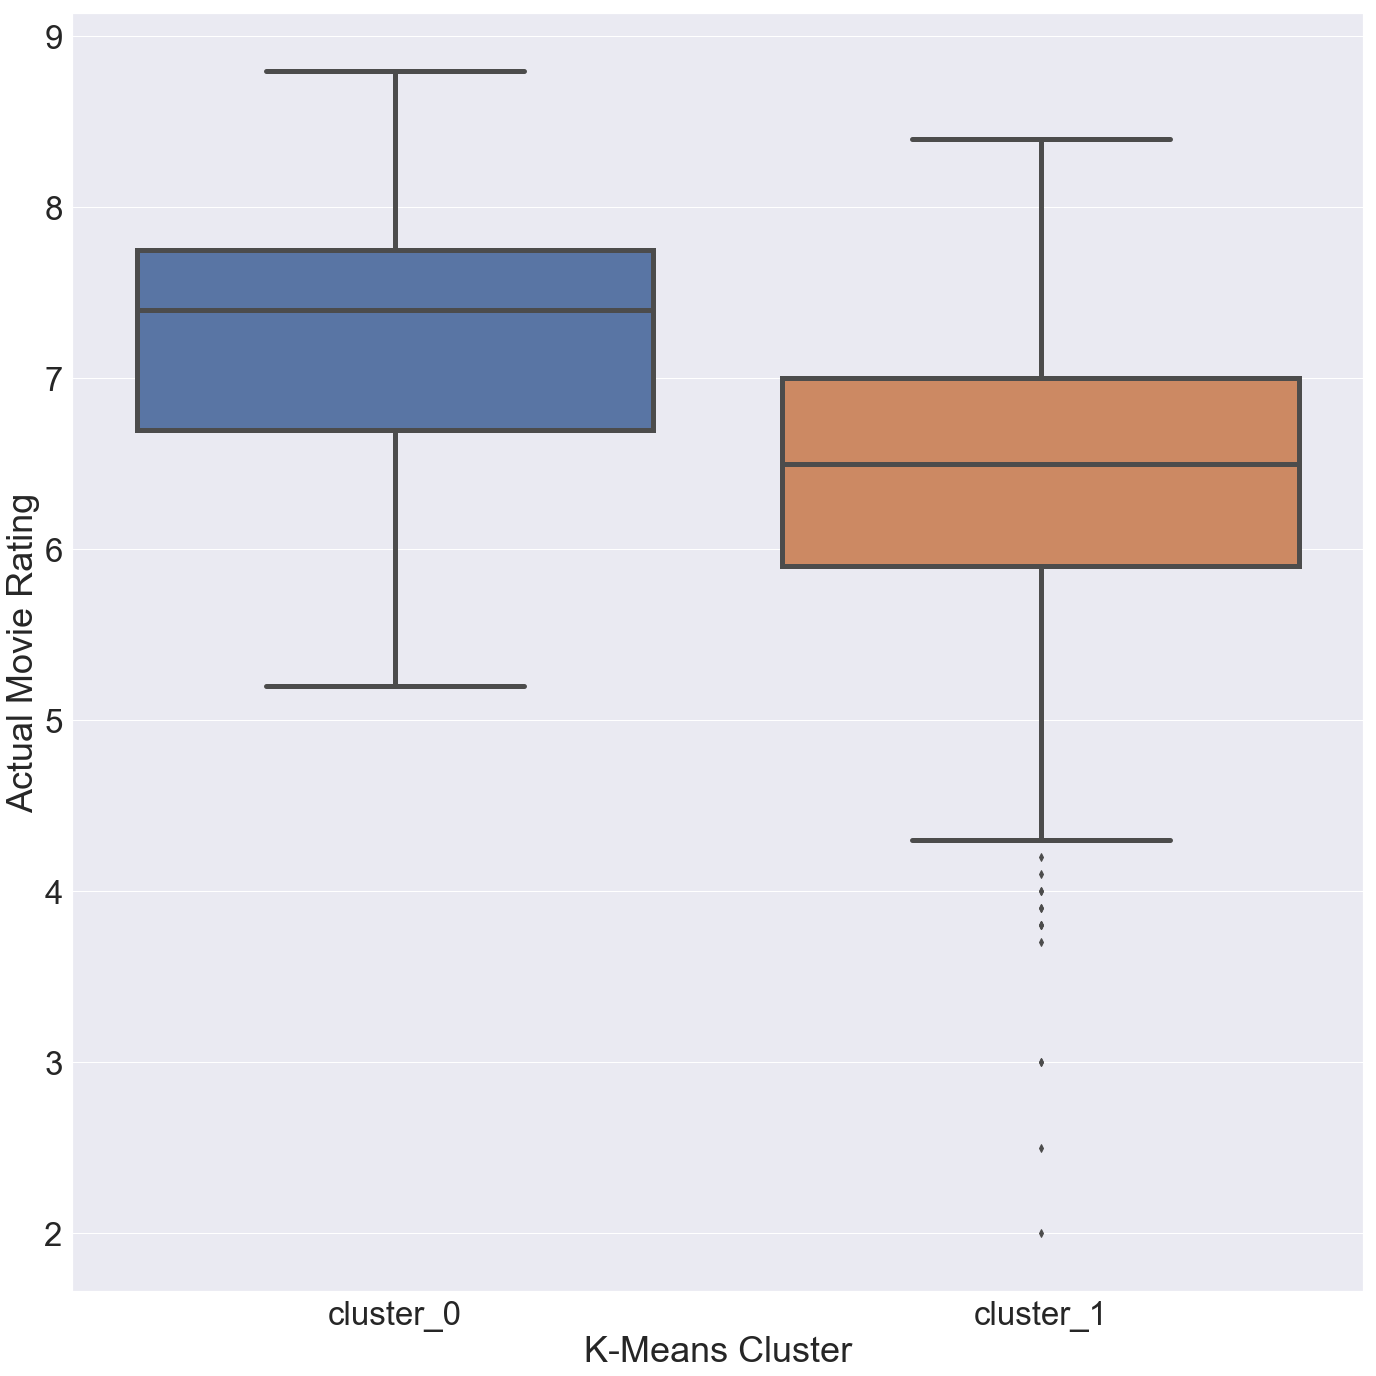

In [70]:
sns.set(font_scale=3) 
plt.figure(figsize=(20,20))

box_plot = sns.boxplot(y = book_movie_data['movie_rating'], x = book_movie_data['k-means'], linewidth=5)
box_plot.set(xlabel='K-Means Cluster',ylabel='Actual Movie Rating')
plt.tight_layout()
fig = box_plot.get_figure()
fig.savefig("k_means.svg")

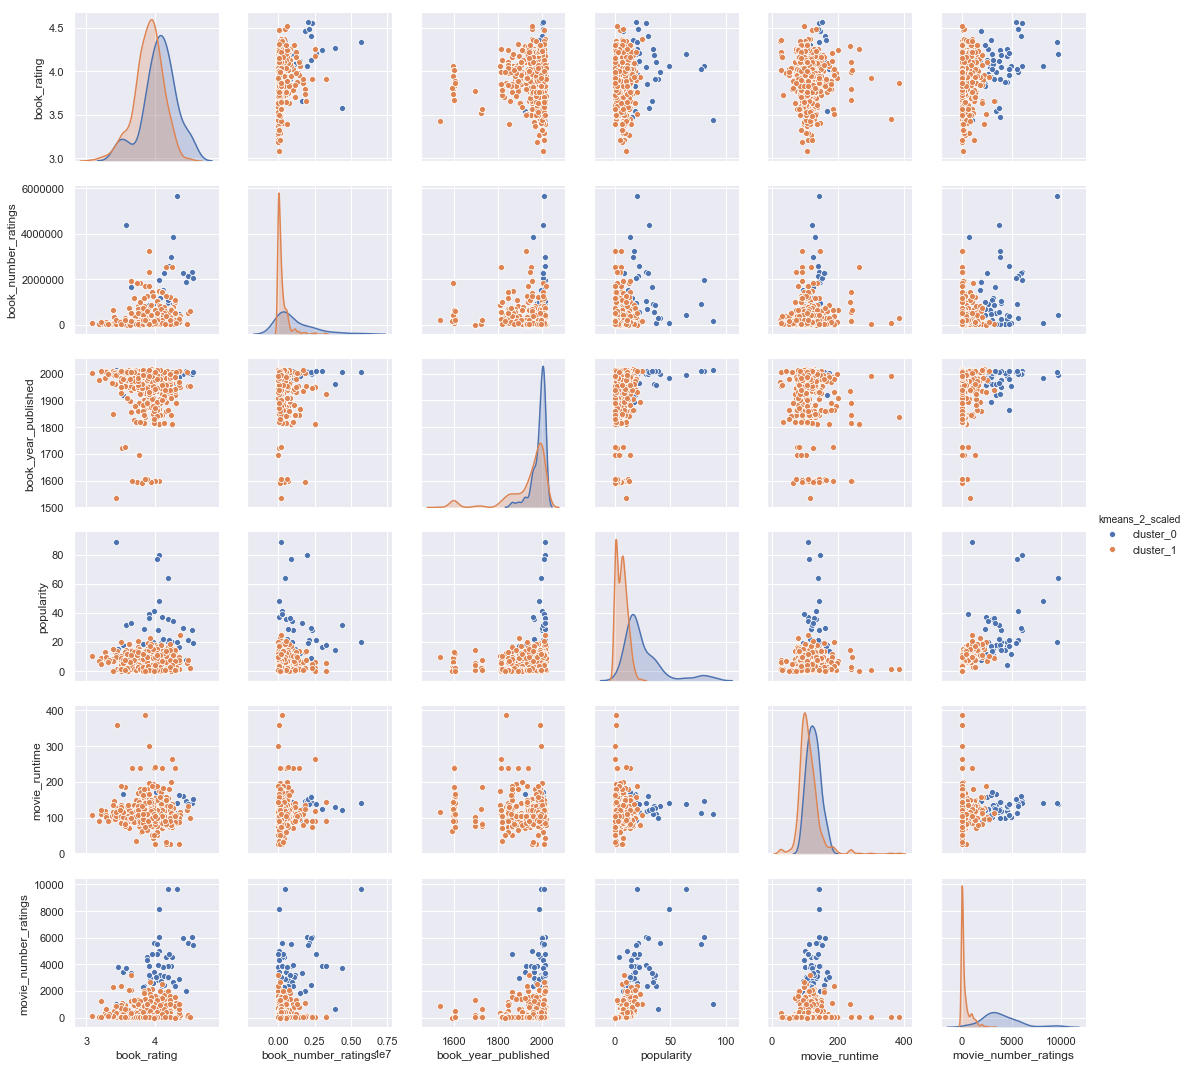

In [59]:
sns.set(font_scale=1)
sns.pairplot(book_movie_data_no_rating,hue="kmeans_2_scaled")

In [ ]:
sns.set(font_scale=1)
sns.pairplot(book_movie_data_no_rating,hue="kmeans_2_scaled")

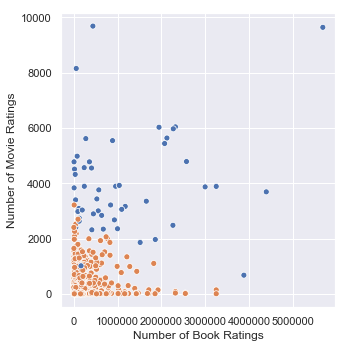

In [77]:
sns.set(font_scale=1) 
plt.figure(figsize=(5,5))

scatter = sns.scatterplot(x="book_number_ratings", y="movie_number_ratings", hue="kmeans_2_scaled",
                     data=book_movie_data_no_rating, legend = False)
scatter.set(xlabel='Number of Book Ratings',ylabel='Number of Movie Ratings')
plt.tight_layout()
fig = scatter.get_figure()
fig.savefig("scatter.svg")

In [60]:
print("Silhouette score when k=2:",silhouette_score(book_movie_data_scaled, km.labels_))

Silhouette score when k=2: 0.5015415284018915


Text(0, 0.5, 'Silhouette Coefficient')

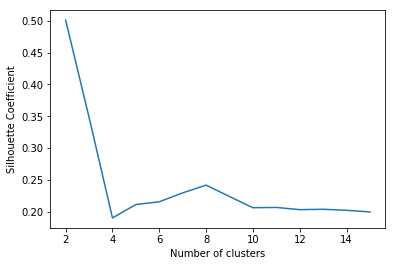

In [70]:
k_range = range(2,16)
scores = []
for k in k_range:
    km_ss = KMeans(n_clusters=k, random_state=1)
    km_ss.fit(book_movie_data_scaled)
    scores.append(silhouette_score(book_movie_data_scaled, km_ss.labels_))

# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')

In [77]:
db = DBSCAN(eps=1, min_samples=10)
db.fit(book_movie_data_scaled)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=10, n_jobs=None, p=None)

In [75]:
db.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  1,  1, -1, -1,  0, -1,
       -1,  0,  0,  0,  2, -1,  0,  0, -1,  0,  0, -1, -1, -1, -1, -1,  0,
        0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,
        0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1, -1,  0,  2,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0, -1, -1, -1,  0,  1, -1, -1,  0, -1, -1, -1, -1,
        0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  1,
        1,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,
        0,  0,  0,  0, -1, -1,  0,  0,  0,  1,  1,  0, -1,  0, -1,  0, -1,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  1,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  1,  1, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0

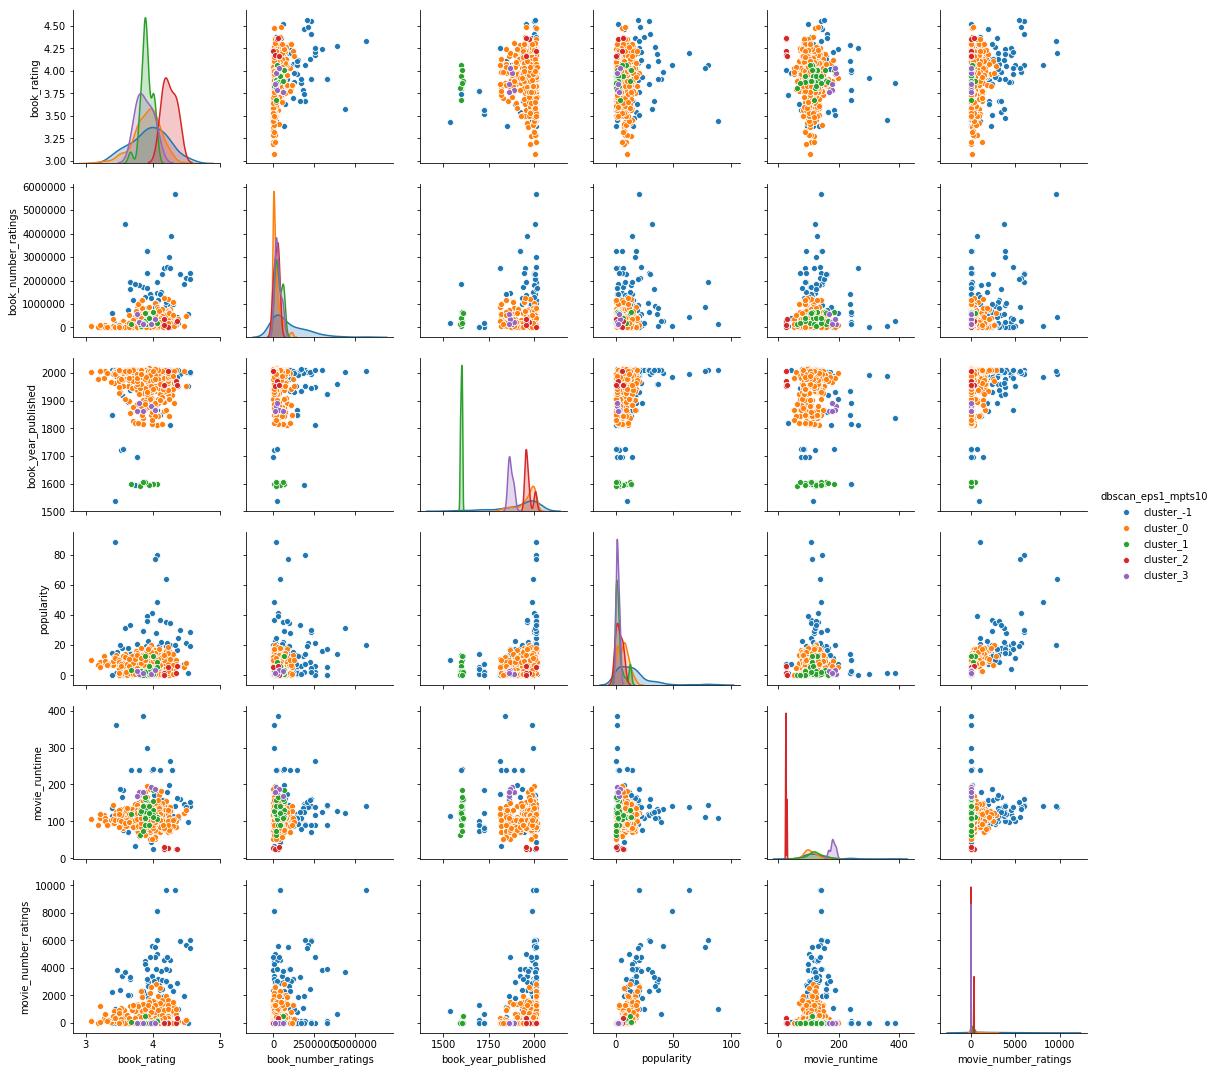

In [76]:
book_movie_data_no_rating['dbscan_eps1_mpts10'] = [ "cluster_" + str(label) for label in db.labels_ ]
sns.pairplot(book_movie_data_no_rating,hue="dbscan_eps1_mpts10")